In [1]:
import AlGDock.BindingPMF_plots
from AlGDock.BindingPMF_plots import *
import os, shutil, glob

phases = ['NAMD_Gas', 'NAMD_OBC']

self = AlGDock.BindingPMF_plots.BPMF_plots(\
  dir_dock='dock', dir_cool='cool',\
  ligand_database='prmtopcrd/ligand.db', \
  forcefield='prmtopcrd/gaff2.dat', \
  ligand_prmtop='prmtopcrd/ligand.prmtop', \
  ligand_inpcrd='prmtopcrd/ligand.trans.inpcrd', \
  ligand_mol2='prmtopcrd/ligand.mol2', \
  ligand_rb='prmtopcrd/ligand.rb', \
  receptor_prmtop='prmtopcrd/receptor.prmtop', \
  receptor_inpcrd='prmtopcrd/receptor.trans.inpcrd', \
  receptor_fixed_atoms='prmtopcrd/receptor.pdb', \
  complex_prmtop='prmtopcrd/complex.prmtop', \
  complex_inpcrd='prmtopcrd/complex.trans.inpcrd', \
  complex_fixed_atoms='prmtopcrd/complex.pdb', \
  score = 'prmtopcrd/xtal_plus_dock6_scored.mol2', \
  temperature_scaling = 'Quadratic', \
  pose = -1, \
  rmsd=True, \
  dir_grid='grids', \
  protocol='Adaptive', cool_therm_speed=25.0, dock_therm_speed=0.25, \
  T_HIGH=450.0, T_SIMMIN=300.0, T_TARGET=300.0, \
  sampler='HMC', \
  MCMC_moves=1, \
  sampling_importance_resampling = True, \
  solvation = 'Full', \
  seeds_per_state=10, steps_per_seed=200, darts_per_seed=0, \
  sweeps_per_cycle=50, attempts_per_sweep=100, \
  steps_per_sweep=50, darts_per_sweep=0, \
  cool_repX_cycles=3, dock_repX_cycles=4, \
  site='Sphere', site_center=[1.7416, 1.7416, 1.7416], \
  site_max_R=1.0, \
  site_density=10., \
  phases=phases, \
  cores=-1, \
  random_seed=-1, \
  max_time=240, \
  keep_intermediate=True)

###########
# AlGDock #
###########
Molecular docking with adaptively scaled alchemical interaction grids

in /Users/dminh/Applications/miniconda2/envs/algdock/lib/python2.7/site-packages/AlGDock/BindingPMF.py
last modified Thu Jul  6 10:03:01 2017
    
using 4/4 available cores
using random number seed of -1

*** Directories ***
  start: /Users/dminh/Installers/AlGDock-0.0.1/Example
  cool: /Users/dminh/Installers/AlGDock-0.0.1/Example/cool
  dock: /Users/dminh/Installers/AlGDock-0.0.1/Example/dock

*** Files ***
previously stored in cool directory:
  prmtop:
    L: prmtopcrd/ligand.prmtop
  ligand_database: prmtopcrd/ligand.db
  forcefield: ../Data/gaff2.dat
  inpcrd:
    L: prmtopcrd/ligand.trans.inpcrd

previously stored in dock directory:
  namd: ../../../Applications/NAMD_2.10/namd2
  grids:
    LJr: grids/LJr.nc
    LJa: grids/LJa.nc
    ELE: grids/pbsa.nc
    desolv: grids/desolv.nc
  prmtop:
    L: prmtopcrd/ligand.prmtop
    R: prmtopcrd/receptor.prmtop
    RL: prmtopcrd/comp

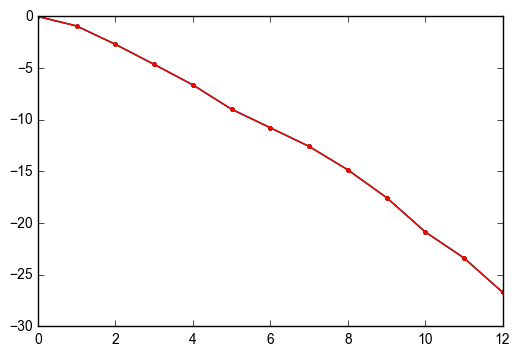

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

for m in range(len(self.f_L['cool_MBAR'])):
  plt.plot(self.f_L['cool_MBAR'][-1], '.-')

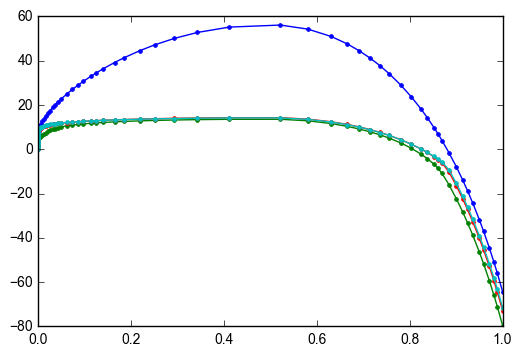

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
for m in range(len(self.f_RL['grid_MBAR'])):
  plt.plot([self.dock_protocol[n]['a'] for n in range(len(self.dock_protocol))], self.f_RL['grid_MBAR'][m],'.-')

In [5]:
self.f_RL['NAMD_OBC_solv']

[-22700.013842152519,
 -22712.638809092143,
 -22712.639019280679,
 -22712.282277970044]

In [6]:
self.B

{'MMTK_MBAR': [-37.844806512376806,
  -53.217645725907971,
  -46.393543810515254,
  -45.037282752834273],
 'NAMD_Gas_EXP': [-217.38483901645398,
  -229.81318589161856,
  -232.60169748506036,
  -228.66659080311223],
 'NAMD_Gas_MBAR': [array([-207.64439127]),
  array([-221.88697799]),
  array([-221.88696992]),
  array([-221.53022296])],
 'NAMD_Gas_mean_Psi': [-222.49072536324098,
  -238.26351633177802,
  -238.26150843742374,
  -238.262249381901],
 'NAMD_Gas_min_Psi': [-223.62071023211467,
  -238.26507052893615,
  -238.26507052893615,
  -238.26507052893615],
 'NAMD_OBC_EXP': [-70.16589461438646,
  -78.900735756794646,
  -80.959725086213368,
  -80.16260486580444],
 'NAMD_OBC_MBAR': [array([-58.20797868]),
  array([-70.83294562]),
  array([-70.8331558]),
  array([-70.47641449])],
 'NAMD_OBC_mean_Psi': [-73.599902009771753,
  -86.183004840298878,
  -86.180676930742962,
  -86.181355695565699],
 'NAMD_OBC_min_Psi': [-73.927986273461983,
  -86.184569735026287,
  -86.184569735026287,
  -86.18456

In [7]:
print self.show_samples(show_receptor=True, clear_files=False)

['/Applications/VMD.app/Contents/Resources/VMD.app/Contents/MacOS/VMD', '-e', '/Users/dminh/Installers/AlGDock-0.0.1/Example/dock/show_samples.vmd']
script:
set ref_ligand [mol new /Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/ligand.prmtop]
mol addfile /Users/dminh/Installers/AlGDock-0.0.1/Example/dock/L.dcd type dcd waitfor all
mol modstyle 0 $ref_ligand Licorice 0.250000 10.000000 10.000000
mol rename $ref_ligand {Reference Pose}
set sel [atomselect $ref_ligand carbon]
$sel set type J
color Type J purple
mol modcolor 0 $ref_ligand Type
set start_ligand [mol new /Users/dminh/Installers/AlGDock-0.0.1/Example/prmtopcrd/ligand.prmtop]
mol addfile /Users/dminh/Installers/AlGDock-0.0.1/Example/dock/L_start.dcd type dcd waitfor all
mol modstyle 0 $start_ligand Licorice 0.250000 10.000000 10.000000
set sel [atomselect $start_ligand carbon]
$sel set type R
color Type R green2
mol modcolor 0 $start_ligand Type
mol rename $start_ligand {Starting Pose}
set complex [mol new /Users/dmin